In [1]:
from fastccm import PairwiseCCM, utils, ccm_utils
from fastccm.data import get_truncated_lorenz_rand
import numpy as np
import matplotlib.pyplot as plt
import time
import torch

### Time statistics

In [8]:

def time_ccm_computation(X_emb, Y_emb, trials=3, device="cpu", method="simplex"):
    
    torch.cuda.empty_cache()
    ccm = PairwiseCCM(device=device, dtype="float32", compute_dtype="float32") 

    start_time = time.time()
    for _ in range(trials):
        ccm.score_matrix(X_emb, Y_emb, library_size=1600, sample_size=550, exclusion_window=30, tp=0, method=method, nbrs_num=10, theta=5, batch_size="auto" )
    total_time =  time.time() - start_time
    
    avg_time = total_time / trials * 1000
    time_per_pair = avg_time / len(X_emb) / len(Y_emb)
    
    return avg_time, time_per_pair


In [9]:
timeseries_counts = [1, 2, 5, 10, 15, 20, 30, 50, 100, 150, 200, 300, 400,500]

In [10]:
X_emb = np.random.uniform(size=(max(timeseries_counts), 100000, 5))
Y_emb = np.random.uniform(size=(max(timeseries_counts), 100000, 1))

In [11]:

results_cpu = []
for count in timeseries_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cpu",method="simplex")
    results_cpu += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 71.953138ms, Time per pair = 71.953138ms
N_sys=2: Avg time = 70.674737ms, Time per pair = 17.668684ms
N_sys=5: Avg time = 73.959351ms, Time per pair = 2.958374ms
N_sys=10: Avg time = 84.041119ms, Time per pair = 0.840411ms
N_sys=15: Avg time = 95.619202ms, Time per pair = 0.424974ms
N_sys=20: Avg time = 104.908864ms, Time per pair = 0.262272ms
N_sys=30: Avg time = 127.240499ms, Time per pair = 0.141378ms
N_sys=50: Avg time = 171.612104ms, Time per pair = 0.068645ms
N_sys=100: Avg time = 299.484730ms, Time per pair = 0.029948ms
N_sys=150: Avg time = 484.075387ms, Time per pair = 0.021514ms
N_sys=200: Avg time = 690.271378ms, Time per pair = 0.017257ms
N_sys=300: Avg time = 1206.979672ms, Time per pair = 0.013411ms
N_sys=400: Avg time = 1824.235439ms, Time per pair = 0.011401ms
N_sys=500: Avg time = 2684.439103ms, Time per pair = 0.010738ms


In [12]:

results_cuda = []
for count in timeseries_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cuda")
    results_cuda += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 67.714135ms, Time per pair = 67.714135ms
N_sys=2: Avg time = 59.238831ms, Time per pair = 14.809708ms
N_sys=5: Avg time = 72.845936ms, Time per pair = 2.913837ms
N_sys=10: Avg time = 70.573568ms, Time per pair = 0.705736ms
N_sys=15: Avg time = 89.660009ms, Time per pair = 0.398489ms
N_sys=20: Avg time = 101.103067ms, Time per pair = 0.252758ms
N_sys=30: Avg time = 107.243776ms, Time per pair = 0.119160ms
N_sys=50: Avg time = 130.812565ms, Time per pair = 0.052325ms
N_sys=100: Avg time = 197.997332ms, Time per pair = 0.019800ms
N_sys=150: Avg time = 256.766399ms, Time per pair = 0.011412ms
N_sys=200: Avg time = 335.421960ms, Time per pair = 0.008386ms
N_sys=300: Avg time = 537.130197ms, Time per pair = 0.005968ms
N_sys=400: Avg time = 748.188655ms, Time per pair = 0.004676ms
N_sys=500: Avg time = 960.373878ms, Time per pair = 0.003841ms


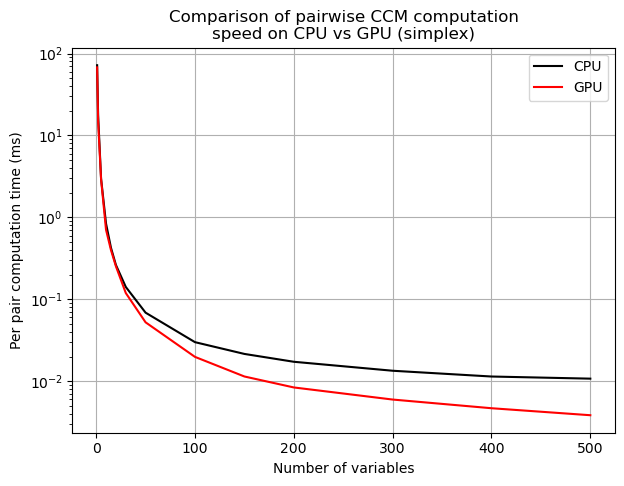

In [13]:
plt.figure(figsize=(7,5))
plt.title("Comparison of pairwise CCM computation\nspeed on CPU vs GPU (simplex)")
plt.plot(timeseries_counts, results_cpu, color="black", label="CPU")
plt.plot(timeseries_counts, results_cuda, color="red", label="GPU")
plt.yscale("log")
plt.xlabel("Number of variables")
plt.ylabel("Per pair computation time (ms)")
plt.legend()
plt.grid()

In [14]:

for count in timeseries_counts[5:7]:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cpu",method="smap")
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=20: Avg time = 2666.153590ms, Time per pair = 6.665384ms
N_sys=30: Avg time = 6099.027713ms, Time per pair = 6.776697ms


In [17]:

for count in timeseries_counts[5:7]:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cuda",method="smap")
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=20: Avg time = 1422.904332ms, Time per pair = 3.557261ms
N_sys=30: Avg time = 3077.237686ms, Time per pair = 3.419153ms


In [13]:
torch.cuda.get_device_name()

'NVIDIA RTX 3500 Ada Generation Laptop GPU'